# Table of Contents
* [Making fake data set](#Making-fake-data-set)
* [Removing gammas](#Removing-gammas)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from scipy.ndimage import median_filter

# Making fake data set

<IPython.core.display.Javascript object>


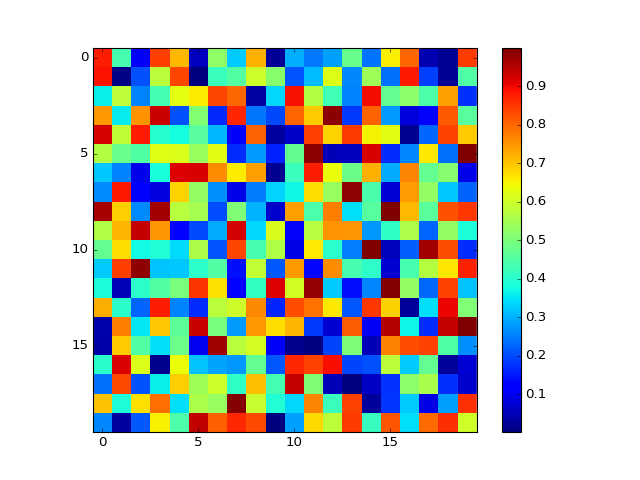

In [2]:
dirty_array = np.random.rand(20,20)
before_adding_gamma = np.array(dirty_array)
plt.figure(1)
plt.imshow(dirty_array, interpolation='none')
plt.colorbar()

Adding some gamma points

<IPython.core.display.Javascript object>


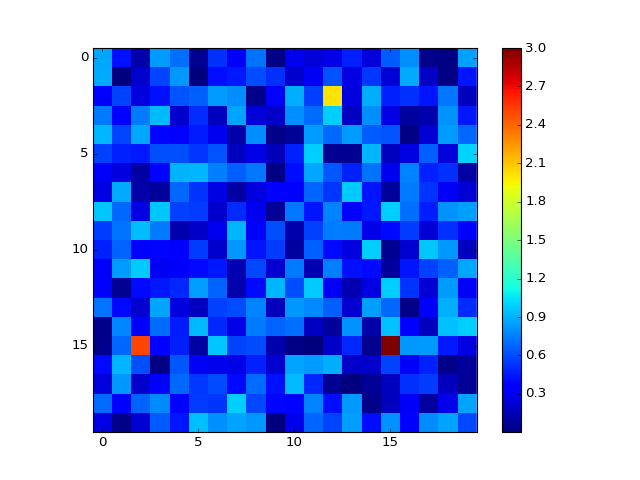

In [3]:
dirty_array[15,15] = 3
dirty_array[2,12] = 2
dirty_array[15,2] = 2.5
plt.figure(2)
plt.imshow(dirty_array, interpolation='none')
plt.colorbar()

# Removing gammas 

In [35]:
def find_outlier_pixels(data,tolerance=3,threshold=0.2, worry_about_edges=False):
    #This function finds the hot or dead pixels in a 2D dataset. 
    #tolerance is the number of standard deviations used to cutoff the hot pixels
    #If you want to ignore the edges and greatly speed up the code, then set
    #worry_about_edges to False.
    #
    #The function returns a list of hot pixels and also an image with with hot pixels removed

    from scipy.ndimage import median_filter
    blurred = median_filter(data, size=2)
    difference = data - blurred
#    threshold = 10*np.std(difference)

    #find the hot pixels, but ignore the edges
    hot_pixels = np.nonzero((np.abs(difference[1:-1,1:-1])>threshold) )
    hot_pixels = np.array(hot_pixels) + 1 #because we ignored the first row and first column

    fixed_image = np.copy(data) #This is the image with the hot pixels removed
    for y,x in zip(hot_pixels[0],hot_pixels[1]):
        fixed_image[y,x]=blurred[y,x]

    if worry_about_edges == True:
        height,width = np.shape(data)

        ###Now get the pixels on the edges (but not the corners)###

        #left and right sides
        for index in range(1,height-1):
            #left side:
            med  = np.median(data[index-1:index+2,0:2])
            diff = np.abs(data[index,0] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[index],[0]]  ))
                fixed_image[index,0] = med

            #right side:
            med  = np.median(data[index-1:index+2,-2:])
            diff = np.abs(data[index,-1] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[index],[width-1]]  ))
                fixed_image[index,-1] = med

        #Then the top and bottom
        for index in range(1,width-1):
            #bottom:
            med  = np.median(data[0:2,index-1:index+2])
            diff = np.abs(data[0,index] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[0],[index]]  ))
                fixed_image[0,index] = med

            #top:
            med  = np.median(data[-2:,index-1:index+2])
            diff = np.abs(data[-1,index] - med)
            if diff>threshold: 
                hot_pixels = np.hstack(( hot_pixels, [[height-1],[index]]  ))
                fixed_image[-1,index] = med

        ###Then the corners###

        #bottom left
        med  = np.median(data[0:2,0:2])
        diff = np.abs(data[0,0] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[0],[0]]  ))
            fixed_image[0,0] = med

        #bottom right
        med  = np.median(data[0:2,-2:])
        diff = np.abs(data[0,-1] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[0],[width-1]]  ))
            fixed_image[0,-1] = med

        #top left
        med  = np.median(data[-2:,0:2])
        diff = np.abs(data[-1,0] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[height-1],[0]]  ))
            fixed_image[-1,0] = med

        #top right
        med  = np.median(data[-2:,-2:])
        diff = np.abs(data[-1,-1] - med)
        if diff>threshold: 
            hot_pixels = np.hstack(( hot_pixels, [[height-1],[width-1]]  ))
            fixed_image[-1,-1] = med

    return [hot_pixels,fixed_image]



[hot_pixels,cleaned_image] = find_outlier_pixels(dirty_array, threshold=0.9, tolerance=1)

<IPython.core.display.Javascript object>


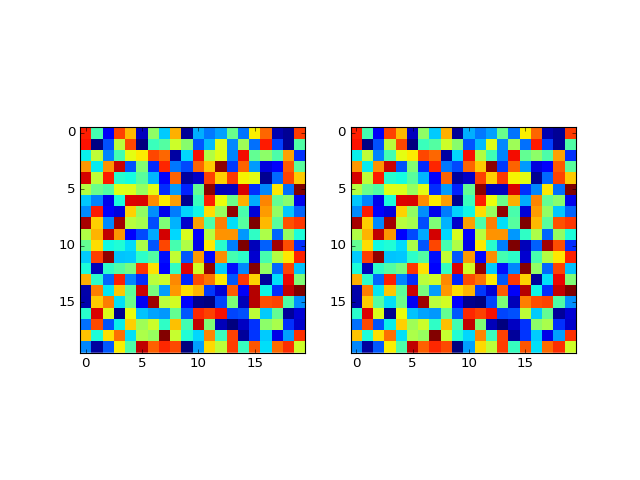

[[ 2 15 15]
 [12  2 15]]


In [36]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cleaned_image, interpolation='none')
ax[1].imshow(before_adding_gamma, interpolation='none')
print(hot_pixels)

# References



http://stackoverflow.com/questions/18951500/automatically-remove-hot-dead-pixels-from-an-image-in-python